In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32
channels = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
model = tf.keras.applications.DenseNet169(weights = "imagenet", include_top=False, 
input_shape = (img_width, img_height, channels))

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          train_generator,k
          steps_per_epoch=train_generator.n // batch_size,
          epochs=18,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/18
 67/180 [==========>...................] - ETA: 13:56 - loss: 0.6743 - accuracy: 0.9430 - precision: 0.9440 - recall: 0.9490 - auc: 0.9725

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


180/180 [==============================] - 1671s 9s/step - loss: 0.3006 - accuracy: 0.9656 - precision: 0.9666 - recall: 0.9685 - auc: 0.9871 - val_loss: 0.0341 - val_accuracy: 0.9951 - val_precision: 0.9935 - val_recall: 0.9974 - val_auc: 0.9970
Epoch 2/18
180/180 [==============================] - 165s 914ms/step - loss: 0.0568 - accuracy: 0.9885 - precision: 0.9892 - recall: 0.9892 - auc: 0.9959 - val_loss: 0.0525 - val_accuracy: 0.9931 - val_precision: 0.9909 - val_recall: 0.9961 - val_auc: 0.9963
Epoch 3/18
180/180 [==============================] - 161s 894ms/step - loss: 0.0655 - accuracy: 0.9880 - precision: 0.9885 - recall: 0.9889 - auc: 0.9954 - val_loss: 0.0330 - val_accuracy: 0.9951 - val_precision: 0.9974 - val_recall: 0.9934 - val_auc: 0.9978
Epoch 4/18
180/180 [==============================] - 162s 899ms/step - loss: 0.0382 - accuracy: 0.9922 - precision: 0.9918 - recall: 0.9934 - auc: 0.9973 - val_loss: 0.0409 - val_accuracy: 0.9951 - val_precision: 0.9934 - val_recall

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.300616 	   0.965607 	   0.034107 	   0.995139
       2   0.056803 	   0.988536 	   0.052464 	   0.993056
       3   0.065542 	   0.988015 	   0.032990 	   0.995139
       4   0.038188 	   0.992183 	   0.040909 	   0.995139
       5   0.029922 	   0.994615 	   0.049903 	   0.994444
       6   0.027594 	   0.995310 	   0.049452 	   0.994444
       7   0.026083 	   0.994268 	   0.190488 	   0.977778
       8   0.025455 	   0.994963 	   0.066550 	   0.991667
       9   0.020364 	   0.996352 	   0.043981 	   0.995139
      10   0.019075 	   0.995657 	   0.061371 	   0.991667
      11   0.018241 	   0.996526 	   0.071338 	   0.993750
      12   0.024361 	   0.997568 	   0.063461 	   0.995833
      13   0.022462 	   0.996700 	   0.040541 	   0.996528
      14   0.017021 	   0.997221 	   0.058051 	   0.995833
      15   0.009285 	   0.997742 	   0.071694 	   0.994444
      16   0.013460 	   0.998263 	   0.06943

In [ ]:
score = top_model.evaluate(validation_generator)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 32s 693ms/step - loss: 0.0690 - accuracy: 0.9938 - precision: 0.9961 - recall: 0.9922 - auc: 0.9965

 Loss:  0.06900201737880707 
 Accuracy:  0.9937759041786194 
 Precision:  0.9960629940032959 
 Recall:  0.9921568632125854 
 F1-Score:  0.9941060915429152 
 AUC:  0.9964671730995178


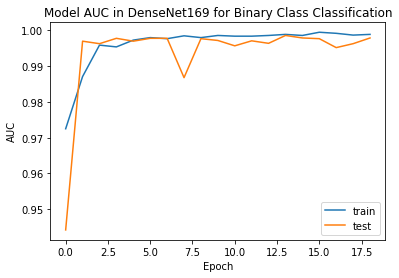

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9725,0.9871,0.9959,0.9954,0.9973,0.9980,0.9977,0.9985,0.9980,0.9986,0.9984,0.9984,0.9986,0.9989,0.9986,0.9995,0.9992,0.9987,0.9989]
val_auc = [0.9442,0.9970,0.9963,0.9978,0.9970,0.9978,0.9978,0.9868,0.9977,0.9972,0.9957,0.9971,0.9964,0.9986,0.9979,0.9977,0.9952,0.9963,0.9979]
plt.title('Model AUC in DenseNet169 for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


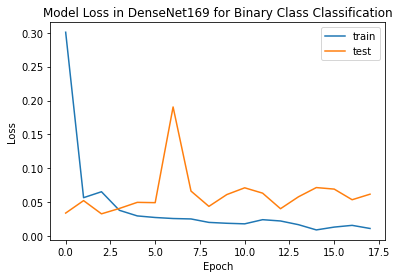

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in DenseNet169 for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossNASNetMobile.png')
pyplot.legend()
pyplot.show()

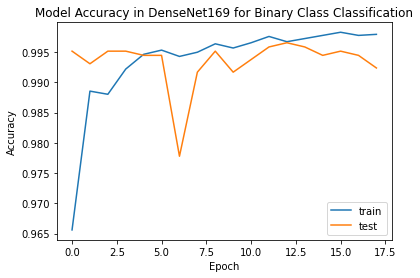

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in DenseNet169 for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyNASNetMobile.png')
pyplot.legend()
pyplot.show()